<a href="https://colab.research.google.com/github/LalithaEvani/Madhumeha/blob/main/Heart_dataa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data And Pre-processing

In [1]:
#importing pandas for loading data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#mount google drive to load the data stored in the drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#read data from drive and separate data based on commas and name each colum with the values given in names attribute. 
data_cleveland = pd.read_csv("/content/drive/My Drive/processed.cleveland.data", sep=",", header=None, names = ['age','sex','chest pain type','resting_blood_pressure','serum cholestrol','fasting_blood_sugar','resting electrocardiographic results','max heart rate achieved','exercise induced angina','ST depression induced by exercise relative to rest','slope of peak exercise ST segment','number of major vessels colored by flouroscopy','thalassaemia','label'])
data_hungarian = pd.read_csv("/content/drive/My Drive/reprocessed.hungarian.data", sep=" ", header=None, names = ['age','sex','chest pain type','resting_blood_pressure','serum cholestrol','fasting_blood_sugar','resting electrocardiographic results','max heart rate achieved','exercise induced angina','ST depression induced by exercise relative to rest','slope of peak exercise ST segment','number of major vessels colored by flouroscopy','thalassaemia','label'])

data_switzerland = pd.read_csv("/content/drive/My Drive/processed.switzerland.data", sep=",", header=None, names = ['age','sex','chest pain type','resting_blood_pressure','serum cholestrol','fasting_blood_sugar','resting electrocardiographic results','max heart rate achieved','exercise induced angina','ST depression induced by exercise relative to rest','slope of peak exercise ST segment','number of major vessels colored by flouroscopy','thalassaemia','label'])
data_va = pd.read_csv("/content/drive/My Drive/processed.va.data", sep=",", header=None, names = ['age','sex','chest pain type','resting_blood_pressure','serum cholestrol','fasting_blood_sugar','resting electrocardiographic results','max heart rate achieved','exercise induced angina','ST depression induced by exercise relative to rest','slope of peak exercise ST segment','number of major vessels colored by flouroscopy','thalassaemia','label'])

In [4]:
#combine all the datasets into one dataset 
frames = [data_cleveland,data_hungarian,data_switzerland,data_va]
data = pd.concat(frames)
data

,age,sex,chest pain type,resting_blood_pressure,serum cholestrol,fasting_blood_sugar,resting electrocardiographic results,max heart rate achieved,exercise induced angina,ST depression induced by exercise relative to rest,slope of peak exercise ST segment,number of major vessels colored by flouroscopy,thalassaemia,label
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54.0,0.0,4.0,127,333,1,1,154,0,0,?,?,?,1.0
196,62.0,1.0,1.0,?,139,0,1,?,?,?,?,?,?,0.0
197,55.0,1.0,4.0,122,223,1,1,100,0,0,?,?,6,2.0
198,58.0,1.0,4.0,?,385,1,2,?,?,?,?,?,?,0.0


In [5]:
#replace '?' with null values
data = data.replace('?',np.nan)
data = data.replace(-9,np.nan)

In [6]:
#there is a complete empty row at 597 so drop it
data = data.drop(data.index[597])

In [7]:
#see how many null values are there in each column
data.isna().sum()

age                                                     0
sex                                                     0
chest pain type                                         0
resting_blood_pressure                                 59
serum cholestrol                                       30
fasting_blood_sugar                                    90
resting electrocardiographic results                    2
max heart rate achieved                                55
exercise induced angina                                55
ST depression induced by exercise relative to rest     62
slope of peak exercise ST segment                     309
number of major vessels colored by flouroscopy        610
thalassaemia                                          486
label                                                   0
dtype: int64

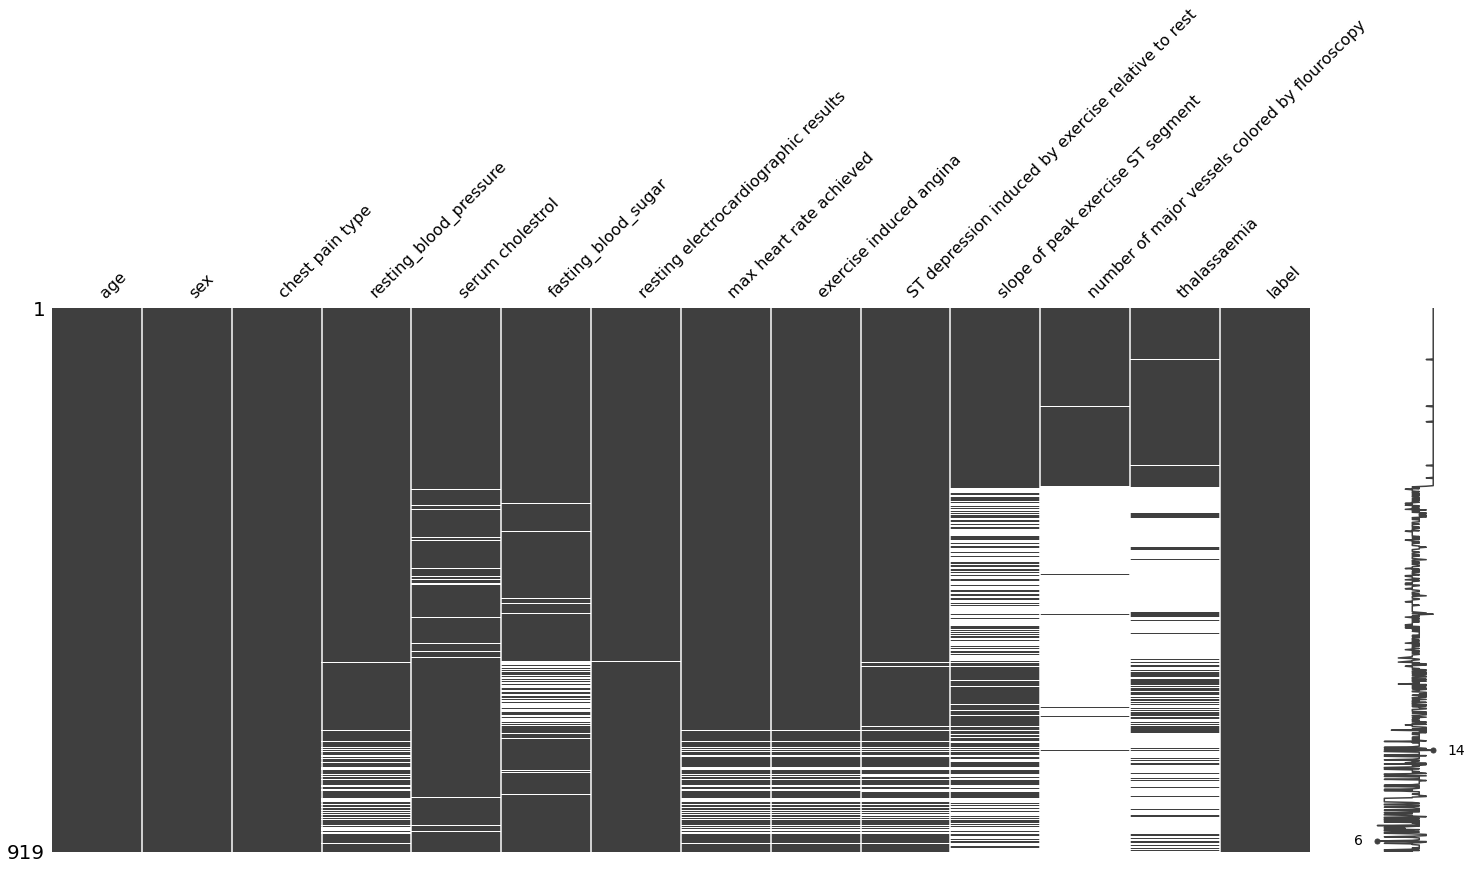

In [8]:
#visualize null values using a matrix 
import missingno as msno
msno.matrix(data)

In [9]:
#you will find out that some of the columns are of type object which will be difficult to handle
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 919 entries, 0 to 199
Data columns (total 14 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   age                                                 919 non-null    float64
 1   sex                                                 919 non-null    float64
 2   chest pain type                                     919 non-null    float64
 3   resting_blood_pressure                              860 non-null    object 
 4   serum cholestrol                                    889 non-null    object 
 5   fasting_blood_sugar                                 829 non-null    object 
 6   resting electrocardiographic results                917 non-null    object 
 7   max heart rate achieved                             864 non-null    object 
 8   exercise induced angina                             864 non-null    object 
 9  

In [10]:
data = data.dropna()

In [11]:
names = ['age','sex','chest pain type','resting_blood_pressure','serum cholestrol','fasting_blood_sugar','resting electrocardiographic results','max heart rate achieved','exercise induced angina','ST depression induced by exercise relative to rest','slope of peak exercise ST segment','number of major vessels colored by flouroscopy','thalassaemia','label']

In [12]:
for name in names:
 data[name] = data[name].astype(float, errors = 'raise').round(2)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 0 to 28
Data columns (total 14 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   age                                                 298 non-null    float64
 1   sex                                                 298 non-null    float64
 2   chest pain type                                     298 non-null    float64
 3   resting_blood_pressure                              298 non-null    float64
 4   serum cholestrol                                    298 non-null    float64
 5   fasting_blood_sugar                                 298 non-null    float64
 6   resting electrocardiographic results                298 non-null    float64
 7   max heart rate achieved                             298 non-null    float64
 8   exercise induced angina                             298 non-null    float64
 9   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
#identify columns which need to be converted to int and store in to_int list 
to_int = ['age','sex','chest pain type','fasting_blood_sugar','resting electrocardiographic results','max heart rate achieved','exercise induced angina','slope of peak exercise ST segment','number of major vessels colored by flouroscopy','thalassaemia','label']

#now convert the type of columns to int 
for name in to_int:
 data[name] = data[name].astype(int, errors = 'raise')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
#identify columns which need to be converted to float and store in to_float list
to_float = ['resting_blood_pressure','serum cholestrol','ST depression induced by exercise relative to rest']

#now convert the type of columns to float 
for name in to_float:
 data[name] = data[name].astype(float, errors = 'raise').round(2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
#check the values in the data_copy
data

,age,sex,chest pain type,resting_blood_pressure,serum cholestrol,fasting_blood_sugar,resting electrocardiographic results,max heart rate achieved,exercise induced angina,ST depression induced by exercise relative to rest,slope of peak exercise ST segment,number of major vessels colored by flouroscopy,thalassaemia,label
0,63,1,1,145.0,233.0,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160.0,286.0,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120.0,229.0,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130.0,250.0,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130.0,204.0,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,68,1,4,144.0,193.0,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130.0,131.0,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130.0,236.0,0,2,174,0,0.0,2,1,3,1
215,47,1,4,150.0,226.0,0,0,98,1,1.5,2,0,7,1


In [16]:
#now check for the type info of data_copy dataFrame
#you will find that the datatype are changed according to the requirement
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 0 to 28
Data columns (total 14 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   age                                                 298 non-null    int64  
 1   sex                                                 298 non-null    int64  
 2   chest pain type                                     298 non-null    int64  
 3   resting_blood_pressure                              298 non-null    float64
 4   serum cholestrol                                    298 non-null    float64
 5   fasting_blood_sugar                                 298 non-null    int64  
 6   resting electrocardiographic results                298 non-null    int64  
 7   max heart rate achieved                             298 non-null    int64  
 8   exercise induced angina                             298 non-null    int64  
 9   

In [17]:
#now we need to take out the diabetic data from heart data
#remove all the rows where people are not suffering from diabetes to obtain only diabetic people data 

heart_data = data[data.fasting_blood_sugar != 0]

#drop the entire column of fasting blood sugar to obtain only heart data of diabetic patients 
heart_data = heart_data.drop(['fasting_blood_sugar'], axis = 1)

In [18]:
#check the data and number of diabetic patients 
heart_data

,age,sex,chest pain type,resting_blood_pressure,serum cholestrol,resting electrocardiographic results,max heart rate achieved,exercise induced angina,ST depression induced by exercise relative to rest,slope of peak exercise ST segment,number of major vessels colored by flouroscopy,thalassaemia,label
0,63,1,1,145.0,233.0,2,150,0,2.3,3,0,6,0
9,53,1,4,140.0,203.0,2,155,1,3.1,3,0,7,1
12,56,1,3,130.0,256.0,2,142,1,0.6,2,1,6,2
14,52,1,3,172.0,199.0,0,162,0,0.5,1,0,7,0
21,58,0,1,150.0,283.0,2,162,0,1.0,1,0,3,0
31,60,1,4,117.0,230.0,0,160,1,1.4,1,2,7,2
39,61,1,3,150.0,243.0,0,137,1,1.0,2,0,3,0
43,59,1,3,150.0,212.0,0,157,0,1.6,1,0,3,0
48,65,0,3,140.0,417.0,2,157,0,0.8,1,1,3,0
49,53,1,3,130.0,197.0,2,152,0,1.2,3,0,3,0


In [19]:
heart_data.to_csv('heart_data.csv')

In [20]:
#Identify number of patients who are not diagnosed of heart disease
heart_data['label'].tolist().count(0)

23